In [32]:
import pandas as pd
import numpy as np

In [33]:
from lxml import html
import requests

In [34]:
main_list_href = []

for i in range(1,74):
    page = requests.get('https://krisha.kz/prodazha/doma/almaty/?das[house.building]=1&page='+str(i))
    tree = html.fromstring(page.content)

    s1 = tree.xpath('//a[@class="a-card__image  "]/@href')
    
    for j in s1:
        main_list_href.append('https://krisha.kz'+j)
        
print(main_list_href)

['https://krisha.kz/a/show/46865704', 'https://krisha.kz/a/show/28457575', 'https://krisha.kz/a/show/48148147', 'https://krisha.kz/a/show/30139566', 'https://krisha.kz/a/show/30485983', 'https://krisha.kz/a/show/4061074', 'https://krisha.kz/a/show/46398952', 'https://krisha.kz/a/show/29304574', 'https://krisha.kz/a/show/25193082', 'https://krisha.kz/a/show/48106444', 'https://krisha.kz/a/show/23679062', 'https://krisha.kz/a/show/14005938', 'https://krisha.kz/a/show/47504876', 'https://krisha.kz/a/show/48075937', 'https://krisha.kz/a/show/47830902', 'https://krisha.kz/a/show/47968219', 'https://krisha.kz/a/show/47744654', 'https://krisha.kz/a/show/46988153', 'https://krisha.kz/a/show/29568167', 'https://krisha.kz/a/show/47893516', 'https://krisha.kz/a/show/47375785', 'https://krisha.kz/a/show/47672255', 'https://krisha.kz/a/show/24524838', 'https://krisha.kz/a/show/48118601', 'https://krisha.kz/a/show/48064026', 'https://krisha.kz/a/show/30589910', 'https://krisha.kz/a/show/47353166', '

In [35]:
print(len(main_list_href))

1426


In [36]:
list_of_regions = []
list_of_squares = []
list_of_levels = []
sanuzel = []
states = []
security = []
price = []

counter = []
s = 0
#s0 = 0
for i in main_list_href:
    page = requests.get(i)
    tree = html.fromstring(page.content)

    s1 = tree.xpath('//div[@class="offer__advert-short-info"]/text()')
    s2 = tree.xpath('//div[@class="offer__price"]/text()')
    s3 = tree.xpath('//div[@class="offer__location offer__advert-short-info"]/span/text()')
    
    try:
        list_of_regions.append(s3[0].split()[1])
    except:
        list_of_regions.append(0)
    
    if len(s1)==6:
        counter.append(s)
        list_of_squares.append(s1[1])
        list_of_levels.append(s1[2])
        sanuzel.append(s1[3])
        states.append(s1[4])
        security.append(s1[5])
    s += 1
    price.append(int(''.join(s2[0].strip().split())))
    #print(s0, price[s0])
    #s0+=1
#print(sanuzel)

In [37]:
len(list_of_regions)

1426

In [38]:
len(price)

1426

In [39]:
counter[len(counter)-1]

1425

In [41]:
for i in range(1425,-1,-1):
    if i not in counter:
        del price[i]
        del list_of_regions[i]

In [42]:
data = pd.DataFrame()

In [43]:
data['price'] = price
data['square'] = list_of_squares
data['region'] = list_of_regions
data['levels'] = list_of_levels
data['san'] = sanuzel
data['states'] = states
data['secur'] = security
data

,price,square,region,levels,san,states,secur
0,30000000,278 м²,Наурызбайский,3,3 м,черновая отделка,4 сот.
1,110000000,270 м²,Медеуский,2,2 с/у и более,евроремонт,сигнализация
2,77000000,"440 (219) м², кухня — 40 м²",Алатауский,4,2 с/у и более,евроремонт,"сигнализация, видеонаблюдение, видеодомофон"
3,73000000,320 м²,Наурызбайский,3,3 м,2 с/у и более,евроремонт
4,19500000,"100 м², кухня — 18 м²",Жетысуский,1,3 м,раздельный,хорошее
5,47000000,"225 (174) м², кухня — 18 м²",Медеуский,2,2.7 м,раздельный,хорошее
6,22000000,150 м²,Ауэзовский,1,2.5 м,раздельный,хорошее
7,10000000,"52 (45) м², кухня — 6 м²",Турксибский,1,совмещенный,требует ремонта,5.28 сот.
8,269000000,"470 м², кухня — 20 м²",Бостандыкский,3,3.2 м,2 с/у и более,евроремонт
9,18000000,"100 (155) м², кухня — 75 м²",0,1,3 м,черновая отделка,мягкая кровля


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 7 columns):
price     1376 non-null int64
square    1376 non-null object
region    1376 non-null object
levels    1376 non-null object
san       1376 non-null object
states    1376 non-null object
secur     1376 non-null object
dtypes: int64(1), object(6)
memory usage: 43.0+ KB


In [45]:
data.to_csv('data_test.csv', index=False)

In [46]:
df = pd.read_csv('data_test.csv')
df.head()

,price,square,region,levels,san,states,secur
0,30000000,278 м²,Наурызбайский,3,3 м,черновая отделка,4 сот.
1,110000000,270 м²,Медеуский,2,2 с/у и более,евроремонт,сигнализация
2,77000000,"440 (219) м², кухня — 40 м²",Алатауский,4,2 с/у и более,евроремонт,"сигнализация, видеонаблюдение, видеодомофон"
3,73000000,320 м²,Наурызбайский,3,3 м,2 с/у и более,евроремонт
4,19500000,"100 м², кухня — 18 м²",Жетысуский,1,3 м,раздельный,хорошее


In [48]:
set(list(df['levels']))

{'0.03 м',
 '1',
 '18.28 сот.',
 '2',
 '2 с/у и более',
 '2.5 м',
 '2.7 м',
 '2.8 м',
 '3',
 '3 м',
 '3.3 м',
 '4',
 '5',
 'во дворе',
 'евроремонт',
 'раздельный',
 'совмещенный',
 'требует ремонта',
 'хорошее'}

In [56]:
df1 = df[df['levels']=='1']
df2 = df[df['levels']=='2']
df3 = df[df['levels']=='3']
df4 = df[df['levels']=='4']
df5 = df[df['levels']=='5']

In [58]:
data1 = pd.concat([df1, df2, df3, df4, df5])
data1.head()

,price,square,region,levels,san,states,secur
4,19500000,"100 м², кухня — 18 м²",Жетысуский,1,3 м,раздельный,хорошее
6,22000000,150 м²,Ауэзовский,1,2.5 м,раздельный,хорошее
7,10000000,"52 (45) м², кухня — 6 м²",Турксибский,1,совмещенный,требует ремонта,5.28 сот.
9,18000000,"100 (155) м², кухня — 75 м²",0,1,3 м,черновая отделка,мягкая кровля
13,20000000,"103.5 (56.2) м², кухня — 18 м²",Алатауский,1,3 м,раздельный,евроремонт


In [59]:
len(data1)

1336

In [60]:
set(list(df['states']))

{'10 сот.',
 '11 сот.',
 '12 сот.',
 '14 сот.',
 '16 сот.',
 '18 сот.',
 '2 с/у и более',
 '20 сот.',
 '3 сот.',
 '3.5 сот.',
 '36 сот.',
 '4 сот.',
 '4.24 сот.',
 '4.5 сот.',
 '4.7 сот.',
 '5 сот.',
 '6 сот.',
 '7 сот.',
 '7.7 сот.',
 '8 сот.',
 '9 сот.',
 '9.7 сот.',
 'Оцинковка',
 'видеодомофон',
 'видеонаблюдение',
 'видеонаблюдение, домофон, круглосуточная охрана',
 'во дворе',
 'да',
 'евроремонт',
 'есть',
 'круглосуточная охрана',
 'метал',
 'металл',
 'металлическая',
 'металлопрофиль',
 'металлочерепица',
 'металочерепица',
 'недостроено',
 'раздельный',
 'решетки на окнах',
 'решетки на окнах, видеодомофон',
 'решетки на окнах, видеонаблюдение',
 'решетки на окнах, видеонаблюдение, домофон, видеодомофон',
 'решетки на окнах, видеонаблюдение, домофон, видеодомофон, круглосуточная охрана',
 'решетки на окнах, домофон',
 'решетки на окнах, сигнализация, видеонаблюдение',
 'решетки на окнах, сигнализация, видеонаблюдение, видеодомофон, круглосуточная охрана',
 'решетки на окнах,

In [61]:
df1 = data1[data1['states']=='евроремонт']
df2 = data1[data1['states']=='недостроено']
df3 = data1[data1['states']=='свободная планировка']
df4 = data1[data1['states']=='среднее']
df5 = data1[data1['states']=='требует ремонта']
df6 = data1[data1['states']=='хорошее']
df7 = data1[data1['states']=='черновая отделка']

In [62]:
data2 = pd.concat([df1,df2,df3,df4,df5,df6,df7])
data2.head()

,price,square,region,levels,san,states,secur
14,26000000,"100 м², кухня — 25 м²",Ауэзовский,1,совмещенный,евроремонт,видеодомофон
204,33000000,135 м²,Турксибский,1,совмещенный,евроремонт,"решетки на окнах, сигнализация"
205,87000000,184 м²,0,1,2 с/у и более,евроремонт,5.2 сот.
226,17000000,120 м²,0,1,совмещенный,евроремонт,8 сот.
355,55200000,"180 м², кухня — 25 м²",Наурызбайский,1,2 с/у и более,евроремонт,8 сот.


In [63]:
len(data2)

471

In [69]:
set(list(df['san']))

{'0.028 м',
 '0.029 м',
 '0.03 м',
 '0.031 м',
 '0.035 м',
 '0.04 м',
 '10 сот.',
 '100 м',
 '11 м',
 '14.67 сот.',
 '2 м',
 '2 с/у и более',
 '2.3 м',
 '2.4 м',
 '2.49 м',
 '2.5 м',
 '2.55 м',
 '2.59 м',
 '2.6 м',
 '2.7 м',
 '2.75 м',
 '2.79 м',
 '2.8 м',
 '2.85 м',
 '2.9 м',
 '28 м',
 '3 м',
 '3 сот.',
 '3.002 м',
 '3.05 м',
 '3.1 м',
 '3.15 м',
 '3.2 м',
 '3.3 м',
 '3.4 м',
 '3.5 м',
 '3.6 м',
 '3.7 м',
 '3.8 м',
 '30 м',
 '4 м',
 '4 сот.',
 '4.3 сот.',
 '5.6 сот.',
 '6 м',
 '7.4 сот.',
 '8 сот.',
 '90 м',
 'во дворе',
 'домофон, круглосуточная охрана',
 'евроремонт',
 'есть возможность подведения',
 'металлочерепица',
 'недостроено',
 'раздельный',
 'решетки на окнах',
 'свободная планировка',
 'совмещенный',
 'среднее',
 'требует ремонта',
 'хорошее',
 'центральное водоснабжение',
 'черновая отделка'}

In [70]:
df1 = data2[data2['san']=='во дворе']
df2 = data2[data2['san']=='есть возможность подведения']
df3 = data2[data2['san']=='раздельный']
df4 = data2[data2['san']=='совмещенный']
df5 = data2[data2['san']=='центральное водоснабжение']

In [71]:
data3 = pd.concat([df1,df2,df3,df4,df5])
data3.head()

,price,square,region,levels,san,states,secur
143,15000000,70 (56) м²,Медеуский,1,во дворе,среднее,металлошифер
654,21500000,"78 м², кухня — 10 м²",Алмалинский,1,во дворе,среднее,6 сот.
963,8000000,"90 (40) м², кухня — 10 м²",0,1,во дворе,среднее,домофон
1039,15500000,"202.6 (121.2) м², кухня — 9.3 м²",Алатауский,2,во дворе,среднее,железо
1040,30000000,"200 (144) м², кухня — 6 м²",Турксибский,2,во дворе,среднее,шифер


In [72]:
len(data3)

117

In [76]:
set(list(data3['square']));

In [77]:
ls = []
for i in data3['square']:
    try:
        ls.append(i.split()[0])
    except:
        ls.append(0)

In [79]:
data3['secur'] = ls
dset = data3.drop(columns = ['secur'], axis=1)
dset.head()

,price,square,region,levels,san,states
143,15000000,70 (56) м²,Медеуский,1,во дворе,среднее
654,21500000,"78 м², кухня — 10 м²",Алмалинский,1,во дворе,среднее
963,8000000,"90 (40) м², кухня — 10 м²",0,1,во дворе,среднее
1039,15500000,"202.6 (121.2) м², кухня — 9.3 м²",Алатауский,2,во дворе,среднее
1040,30000000,"200 (144) м², кухня — 6 м²",Турксибский,2,во дворе,среднее


In [80]:
len(dset)

117

In [85]:
l1 = []

for i in ls:
    l1.append(float(i))
dset['square'] = l1
dset.head()

,price,square,region,levels,san,states
143,15000000,70.0,Медеуский,1,во дворе,среднее
654,21500000,78.0,Алмалинский,1,во дворе,среднее
963,8000000,90.0,0,1,во дворе,среднее
1039,15500000,202.6,Алатауский,2,во дворе,среднее
1040,30000000,200.0,Турксибский,2,во дворе,среднее


In [87]:
dset = pd.get_dummies(dset)
dset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 143 to 932
Data columns (total 24 columns):
price                          117 non-null int64
square                         117 non-null float64
region_0                       117 non-null uint8
region_Алатауский              117 non-null uint8
region_Алмалинский             117 non-null uint8
region_Ауэзовский              117 non-null uint8
region_Бостандыкский           117 non-null uint8
region_Жетысуский              117 non-null uint8
region_Медеуский               117 non-null uint8
region_Наурызбайский           117 non-null uint8
region_Турксибский             117 non-null uint8
levels_1                       117 non-null uint8
levels_2                       117 non-null uint8
levels_3                       117 non-null uint8
levels_4                       117 non-null uint8
san_во дворе                   117 non-null uint8
san_раздельный                 117 non-null uint8
san_совмещенный                117 non-nu

In [88]:
dset = dset.drop(columns=['region_0'], axis=1)
dset.head()

,price,square,region_Алатауский,region_Алмалинский,region_Ауэзовский,region_Бостандыкский,region_Жетысуский,region_Медеуский,region_Наурызбайский,region_Турксибский,...,levels_4,san_во дворе,san_раздельный,san_совмещенный,states_евроремонт,states_свободная планировка,states_среднее,states_требует ремонта,states_хорошее,states_черновая отделка
143,15000000,70.0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
654,21500000,78.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
963,8000000,90.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1039,15500000,202.6,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1040,30000000,200.0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [89]:
y = dset['price']
X = dset.drop(columns=['price'], axis=1)

In [91]:
y.head()

143     15000000
654     21500000
963      8000000
1039    15500000
1040    30000000
Name: price, dtype: int64

Dec

In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
DecisionTreeRegressor?

In [100]:
params = {'max_depth': range(1,11)}

In [101]:
acc_list_abs = []
acc_list_sq = []

counter = 1

for i in range(3,11):
    tree_ = DecisionTreeRegressor()
    grid_tree = GridSearchCV(tree_, param_grid=params, cv=i, n_jobs=-1)
    grid_tree.fit(X_train, y_train)
    acc_list_abs.append(mean_absolute_error(y_test,grid_tree.best_estimator_.predict(X_test)))
    acc_list_sq.append(mean_squared_error(y_test,grid_tree.best_estimator_.predict(X_test)))
    print(counter)
    counter+=1

1
2
3
4
5
6
7
8


In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Errors')

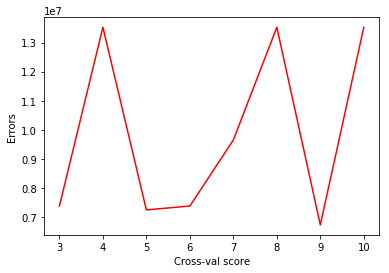

In [107]:
plt.plot(range(3,11), acc_list_abs, color='r')
#plt.plot(range(3,11), acc_list_sq, color='b')
plt.xlabel("Cross-val score")
plt.ylabel("Errors")

In [108]:
RandomForestRegressor?

In [109]:
params2 = {'max_depth': range(1,11), 'max_features': range(1,21)}

In [110]:
acc_list_abs = []
acc_list_sq = []

counter = 1

for i in range(3,11):
    rand_ = RandomForestRegressor()
    grid_rand = GridSearchCV(rand_, param_grid=params, cv=i, n_jobs=-1)
    grid_rand.fit(X_train, y_train)
    acc_list_abs.append(mean_absolute_error(y_test,grid_rand.best_estimator_.predict(X_test)))
    #acc_list_sq.append(mean_squared_error(y_test,grid_tree.best_estimator_.predict(X_test)))
    print(counter)
    counter+=1

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


2


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


3


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


4


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


5


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


6


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


7
8


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0, 0.5, 'Errors')

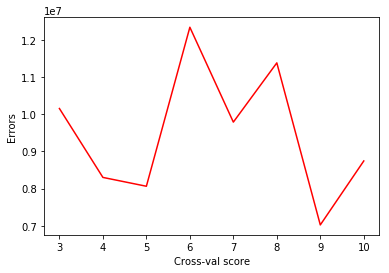

In [111]:
plt.plot(range(3,11), acc_list_abs, color='r')
#plt.plot(range(3,11), acc_list_sq, color='b')
plt.xlabel("Cross-val score")
plt.ylabel("Errors")